<a href="https://colab.research.google.com/github/zebakhan123/Exploratory-Data-Analysis-/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path='/content/drive/MyDrive/Colab Notebooks/Airbnb NYC 2019.csv'
df = pd.read_csv(path)

In [4]:
df.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [12]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [13]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [14]:
df.groupby(['neighbourhood_group'])['minimum_nights'].describe() #.unstack()

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,,,,,,,,
Bronx,1091.0,4.560953,15.631792,1.0,1.0,2.0,3.0,365.0
Brooklyn,20104.0,6.056556,17.632726,1.0,2.0,3.0,5.0,999.0
Manhattan,21661.0,8.579151,24.050857,1.0,1.0,3.0,6.0,1250.0
Queens,5666.0,5.181433,15.028725,1.0,1.0,2.0,3.0,500.0
Staten Island,373.0,4.831099,19.727605,1.0,1.0,2.0,3.0,365.0


In [15]:
df.groupby(['neighbourhood_group'])['minimum_nights'].describe().transpose()

neighbourhood_group,Bronx,Brooklyn,Manhattan,Queens,Staten Island
count,1091.000000,20104.000000,21661.000000,5666.000000,373.000000
mean,4.560953,6.056556,8.579151,5.181433,4.831099
std,15.631792,17.632726,24.050857,15.028725,19.727605
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,1.000000,1.000000,1.000000
50%,2.000000,3.000000,3.000000,2.000000,2.000000
75%,3.000000,5.000000,6.000000,3.000000,3.000000
max,365.000000,999.000000,1250.000000,500.000000,365.000000


Text(0.5, 0, 'neighbourhood_group')

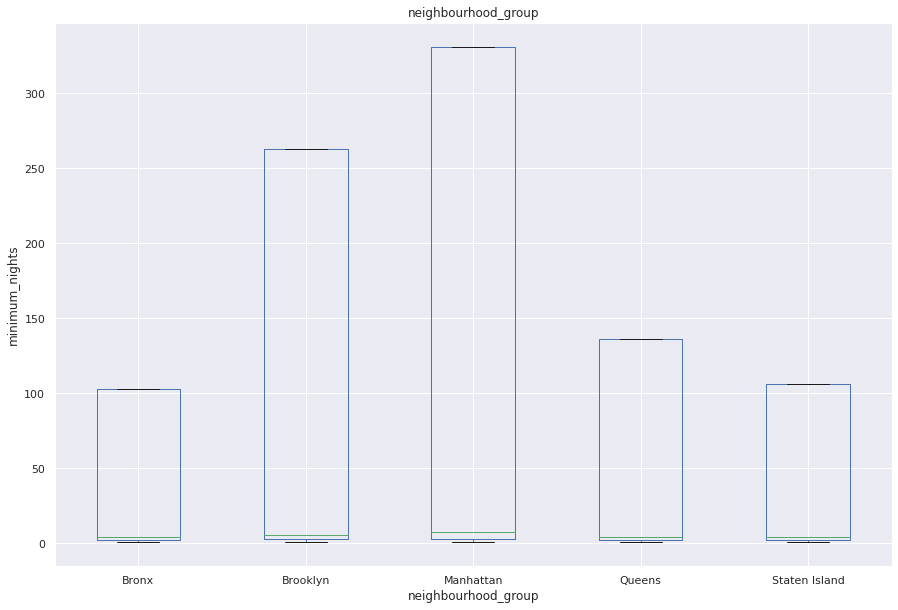

In [17]:
df.groupby(['neighbourhood_group'])['minimum_nights'].describe().transpose().plot(kind="box" , showfliers=False)
plt.title('neighbourhood_group')
plt.ylabel('minimum_nights')
plt.xlabel('neighbourhood_group')

In [18]:
# Since maximum= Q3 + 1.5(IQR) we get 11 becuase minimum night criterion over and above 75 percentile criterion of values greater than 5 are understandable but upto 999 is not accurate

In [19]:
df = pd.read_csv(path,parse_dates=['last_review'])

In [20]:
#After writing parse_dates=['last_review'] using df.info()

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48895 non-null  int64         
 1   name                            48879 non-null  object        
 2   host_id                         48895 non-null  int64         
 3   host_name                       48874 non-null  object        
 4   neighbourhood_group             48895 non-null  object        
 5   neighbourhood                   48895 non-null  object        
 6   latitude                        48895 non-null  float64       
 7   longitude                       48895 non-null  float64       
 8   room_type                       48895 non-null  object        
 9   price                           48895 non-null  int64         
 10  minimum_nights                  48895 non-null  int64         
 11  nu

In [22]:
#last_review is now datetime64[ns] and not datetime64[ns]

In [23]:
df.shape

(48895, 16)

In [24]:
# is.na values and absurd numerical values of variable of interest

In [25]:
df.groupby('neighbourhood_group')['neighbourhood_group'].count()

neighbourhood_group
Bronx             1091
Brooklyn         20104
Manhattan        21661
Queens            5666
Staten Island      373
Name: neighbourhood_group, dtype: int64

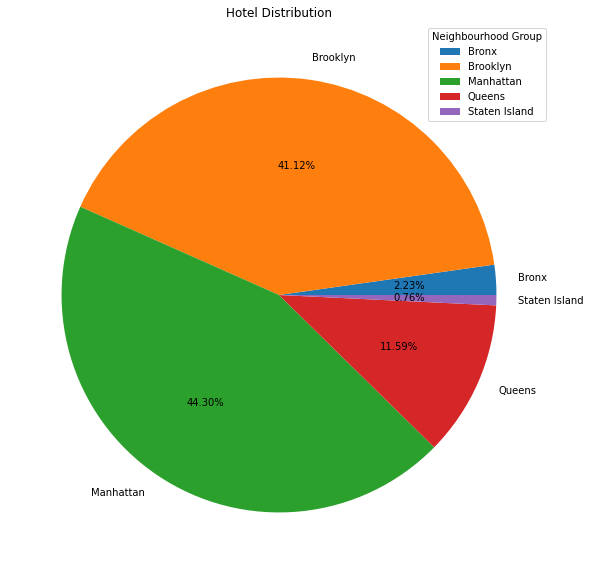

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
#sns.distplot(df.groupby('neighbourhood_group')['neighbourhood_group'].count(), kind=pie)
plt.figure(figsize=(10,10))
mylabels = ['Bronx','Brooklyn','Manhattan','Queens','Staten Island']
plt.pie(df.groupby('neighbourhood_group')['neighbourhood_group'].count() , autopct='%1.2f%%', labels = mylabels)
#plt.pie(df.groupby('neighbourhood_group')['neighbourhood_group'].count() , autopct='%1.2f%%')
plt.legend(title = "Neighbourhood Group")
plt.title("Hotel Distribution")
#plt.figure(figsize=(45,150))
plt.show()

In [5]:
#import matplotlib.pyplot as plt
#plt.figure(figsize=(10,5))
#plt.scatter(x=df['longitude'], y=df['latitude'])

#colors = np.random.rand(N)
#plt.show()

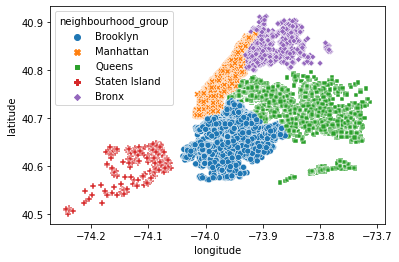

In [8]:

sns.scatterplot(x=df['longitude'], y=df['latitude'], hue=df['neighbourhood_group'], style=df['neighbourhood_group'])
#sns.palplot(sns.color_palette("muted"))
#sns.figsize()
sns.set(rc= {"figure.figsize": (15, 10)})
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


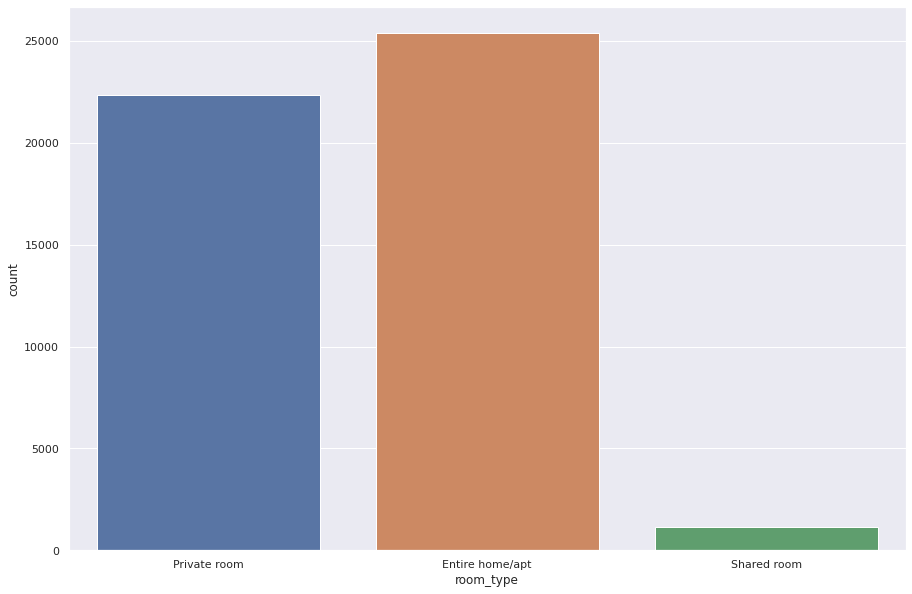

In [9]:
sns.countplot(df.room_type)

In [28]:
#neighbourhood group vs room type
#   rt1  rt2  rt3
#n1
#n2
#n3
#n4

df.groupby(['neighbourhood_group', 'room_type'])['room_type'].value_counts()

neighbourhood_group  room_type        room_type      
Bronx                Entire home/apt  Entire home/apt      379
                     Private room     Private room         652
                     Shared room      Shared room           60
Brooklyn             Entire home/apt  Entire home/apt     9559
                     Private room     Private room       10132
                     Shared room      Shared room          413
Manhattan            Entire home/apt  Entire home/apt    13199
                     Private room     Private room        7982
                     Shared room      Shared room          480
Queens               Entire home/apt  Entire home/apt     2096
                     Private room     Private room        3372
                     Shared room      Shared room          198
Staten Island        Entire home/apt  Entire home/apt      176
                     Private room     Private room         188
                     Shared room      Shared room            9
N

In [35]:
df.groupby(['neighbourhood_group'])['room_type'].value_counts()

neighbourhood_group  room_type      
Bronx                Private room         652
                     Entire home/apt      379
                     Shared room           60
Brooklyn             Private room       10132
                     Entire home/apt     9559
                     Shared room          413
Manhattan            Entire home/apt    13199
                     Private room        7982
                     Shared room          480
Queens               Private room        3372
                     Entire home/apt     2096
                     Shared room          198
Staten Island        Private room         188
                     Entire home/apt      176
                     Shared room            9
Name: room_type, dtype: int64

In [36]:
df.groupby(['neighbourhood_group'])['room_type'].value_counts().unstack()

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,379,652,60
Brooklyn,9559,10132,413
Manhattan,13199,7982,480
Queens,2096,3372,198
Staten Island,176,188,9


In [48]:
new_data_frame=df.groupby(['neighbourhood_group'])['room_type'].value_counts().unstack()
new_data_frame

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,379,652,60
Brooklyn,9559,10132,413
Manhattan,13199,7982,480
Queens,2096,3372,198
Staten Island,176,188,9


In [49]:
new_data_frame.iloc[1:3]

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Brooklyn,9559,10132,413
Manhattan,13199,7982,480


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

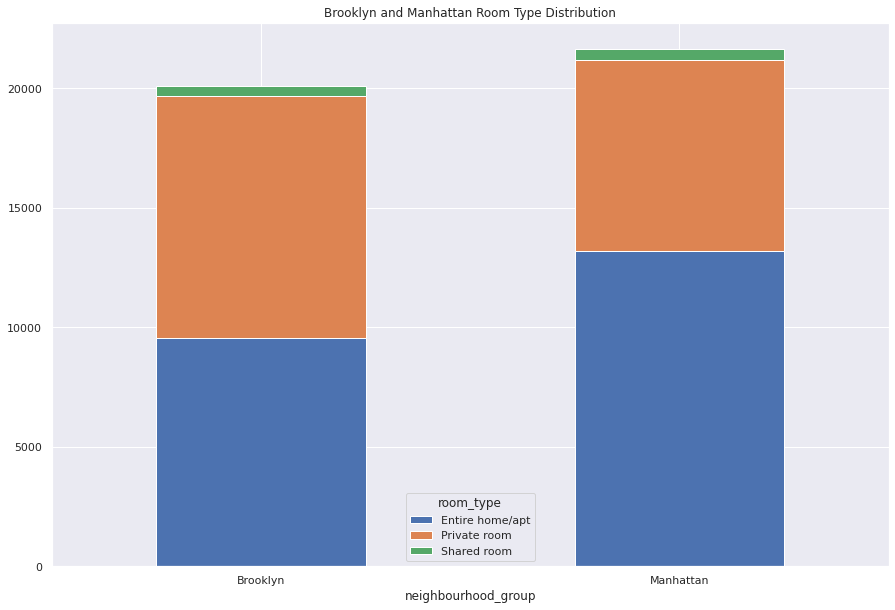

In [54]:
new_data_frame.iloc[1:3].plot(kind='bar', stacked=True)
plt.title('Brooklyn and Manhattan Room Type Distribution')
plt.xticks(rotation=360, ha='center')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


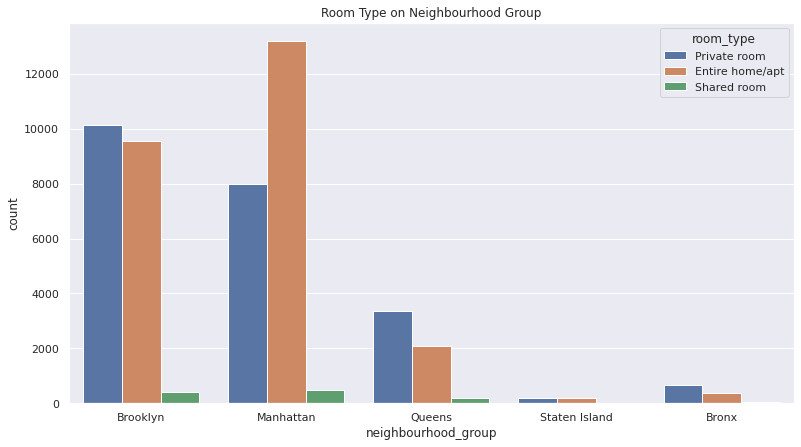

In [38]:
plt.figure(figsize=(13,7))
plt.title("Room Type on Neighbourhood Group")
sns.countplot(df.neighbourhood_group,hue=df.room_type)
plt.show()